# Denver Broncos and Crime
## The effect a Denver Broncos win/lose streak has on Crime in Denver

### Contents
- Data Preparation
- Denver Broncos results
- Crime in Denver
- Denver Broncos Form
- Denver Broncos Streaks

In [2]:
import os.path
import datetime
import pandas as pd
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Preparation

In [3]:
if not os.path.exists( "../../data/prep/700_NFL.csv" ):
    print("Missing dataset file")

In [4]:
nfl = pd.read_csv("../../data/prep/700_NFL.csv", index_col="kickoff", parse_dates=True)
nfl.shape

(373, 6)

Sorting the dates of the games...

In [5]:
nfl.sort_index(ascending=True)

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference
kickoff,,,,,,
2007-09-09,Bills,14,15,Broncos,Away Win,-1
2007-09-09,Chargers,14,3,Bears,Home Win,11
2007-09-09,Vikings,24,3,Falcons,Home Win,21
2007-09-16,Bears,20,10,Chiefs,Home Win,10
2007-09-16,Broncos,23,20,Raiders,Home Win,3
2007-09-16,Lions,20,17,Vikings,Home Win,3
2007-09-23,Bears,10,34,Cowboys,Away Win,-24
2007-09-23,Broncos,14,23,Jaguars,Away Win,-9
2007-09-23,Chiefs,13,10,Vikings,Home Win,3


# Denver Broncos

We'll look at the Denver Broncos..

In [6]:
bro = nfl[(nfl.values  == "Broncos")]

In [7]:
bro.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference
kickoff,,,,,,
2007-09-09,Bills,14,15,Broncos,Away Win,-1
2007-09-16,Broncos,23,20,Raiders,Home Win,3
2007-09-23,Broncos,14,23,Jaguars,Away Win,-9
2007-09-30,Colts,38,20,Broncos,Home Win,18
2007-10-07,Broncos,3,41,Chargers,Away Win,-38


We'll look at their home games first. We assign 1 point to a win, 0 for a draw and -1 for a loss. This will be important when we look at the form and streaks. 

In [8]:
broHome = bro[bro['Home/Neutral'] == 'Broncos']

In [9]:
conditions = [
    (broHome['PTS.1'] > broHome['PTS']),
    (broHome['PTS'] == broHome['PTS.1'])]
choices = [1, 0]
broHome['bro Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
broHome.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,bro Res
kickoff,,,,,,,
2007-09-16,Broncos,23,20,Raiders,Home Win,3,1
2007-09-23,Broncos,14,23,Jaguars,Away Win,-9,-1
2007-10-07,Broncos,3,41,Chargers,Away Win,-38,-1
2007-10-21,Broncos,31,28,Steelers,Home Win,3,1
2007-10-29,Broncos,13,19,Packers,Away Win,-6,-1


and now their away games...

In [11]:
broAway = bro[bro['Visitor/Neutral'] == 'Broncos']

In [12]:
conditions = [
    (broAway['PTS'] > broAway['PTS.1']),
    (broAway['PTS'] == broAway['PTS.1'])]
choices = [1, 0]
broAway['bro Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
broAway.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,bro Res
kickoff,,,,,,,
2007-09-09,Bills,14,15,Broncos,Away Win,-1,1
2007-09-30,Colts,38,20,Broncos,Home Win,18,-1
2007-11-04,Lions,44,7,Broncos,Home Win,37,-1
2007-11-11,Chiefs,11,27,Broncos,Away Win,-16,1
2007-11-25,Bears,37,34,Broncos,Home Win,3,-1


We'll combine the 2 dataframes

In [14]:
fram1 = [broHome, broAway]
broRes = pd.concat(fram1, axis = 0)

In [15]:
broRes.tail()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,bro Res
kickoff,,,,,,,
2014-11-09,Raiders,17,41,Broncos,Away Win,-24,1
2014-11-16,Rams,22,7,Broncos,Home Win,15,-1
2014-12-01,Chiefs,16,29,Broncos,Away Win,-13,1
2014-12-14,Chargers,10,22,Broncos,Away Win,-12,1
2014-12-23,Bengals,37,28,Broncos,Home Win,9,-1


The index is sorted again

In [16]:
broRes = broRes.sort_index()

A sample plot of a months games...

<function matplotlib.pyplot.show>

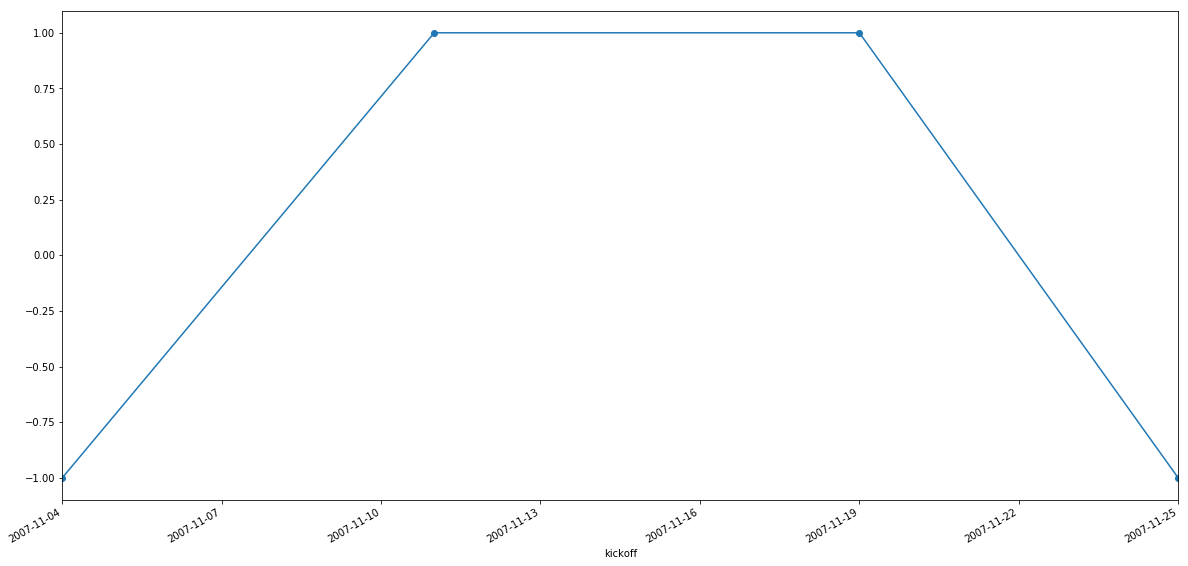

In [17]:
ctest2 = broRes.loc['2007-11-02':'2007-11-30']
ctest2['bro Res'].plot(style='o-', figsize = (20, 10))
plt.show

In [18]:
ctest3 = broRes.loc['2009-11-02':'2010-06-30']
ctest3

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,bro Res
kickoff,,,,,,,
2009-11-09,Broncos,10,28,Steelers,Away Win,-18,-1
2009-11-15,Redskins,27,17,Broncos,Home Win,10,-1
2009-11-22,Broncos,3,32,Chargers,Away Win,-29,-1
2009-11-26,Broncos,26,6,Giants,Home Win,20,1
2009-12-06,Chiefs,13,44,Broncos,Away Win,-31,1
2009-12-13,Colts,28,16,Broncos,Home Win,12,-1
2009-12-20,Broncos,19,20,Raiders,Away Win,-1,-1
2009-12-27,Eagles,30,27,Broncos,Home Win,3,-1
2010-01-03,Broncos,24,44,Chiefs,Away Win,-20,-1


The unnecessary columns are now dropped...

In [19]:
broRes= broRes.drop('Visitor/Neutral', 1)
broRes= broRes.drop('PTS', 1)
broRes= broRes.drop('Home/Neutral', 1)
broRes= broRes.drop('PTS.1', 1)
broRes= broRes.drop('Result', 1)
broRes= broRes.drop('Difference', 1)

The irrelevant dates are filtered out...

In [20]:
start_remove = pd.to_datetime('2015-12-31')
end_remove = pd.to_datetime('2013-01-01')

In [21]:
broRes = broRes.loc[(broRes.index < start_remove) & (broRes.index > end_remove)]

In [22]:
broRes.head()

,bro Res
kickoff,
2013-01-12,-1
2013-09-06,1
2013-09-15,1
2013-09-24,1
2013-09-29,1


# Denver Crime

We now load in the Denver crime dataset...

In [23]:
brocrime = pd.read_csv( "../../data/prep/700_Denver.csv", index_col="date", parse_dates=True)

Looking at crimes year by year...

<function matplotlib.pyplot.show>

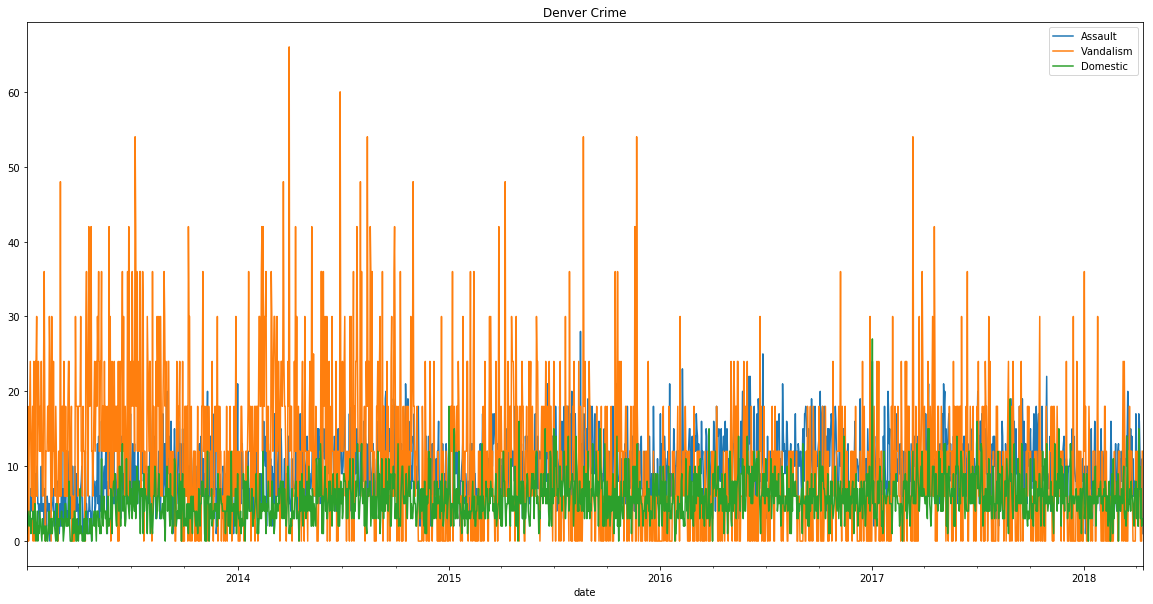

In [24]:
plt.subplot()

a1p = brocrime[brocrime['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = brocrime[brocrime['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = brocrime[brocrime['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()

plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Denver Crime')

plt.show

<function matplotlib.pyplot.show>

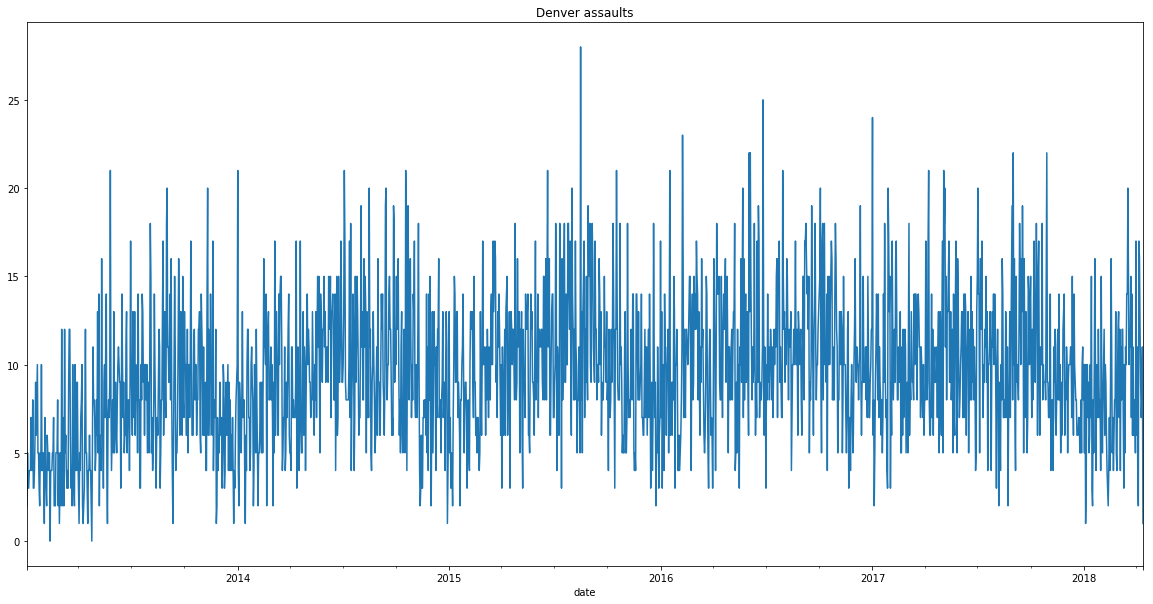

In [25]:
plt.subplot()

a1p = brocrime[brocrime['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

plt.title('Denver assaults')

plt.show

<function matplotlib.pyplot.show>

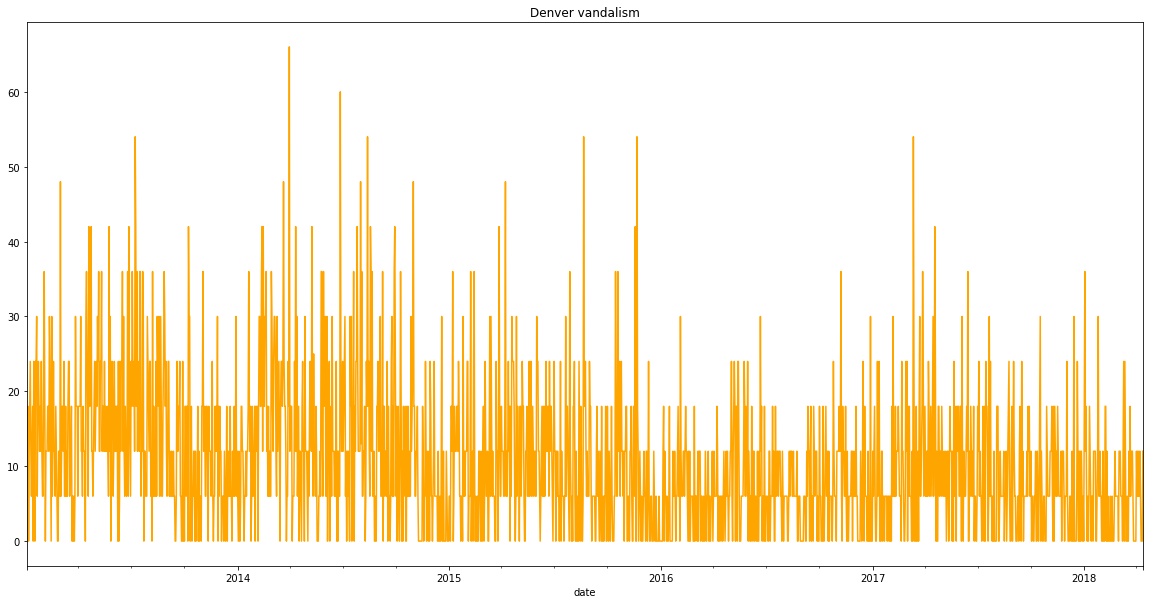

In [26]:
plt.subplot()


v1p = brocrime[brocrime['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot(figsize = (20, 10), color = 'orange')

plt.title('Denver vandalism')

plt.show

<function matplotlib.pyplot.show>

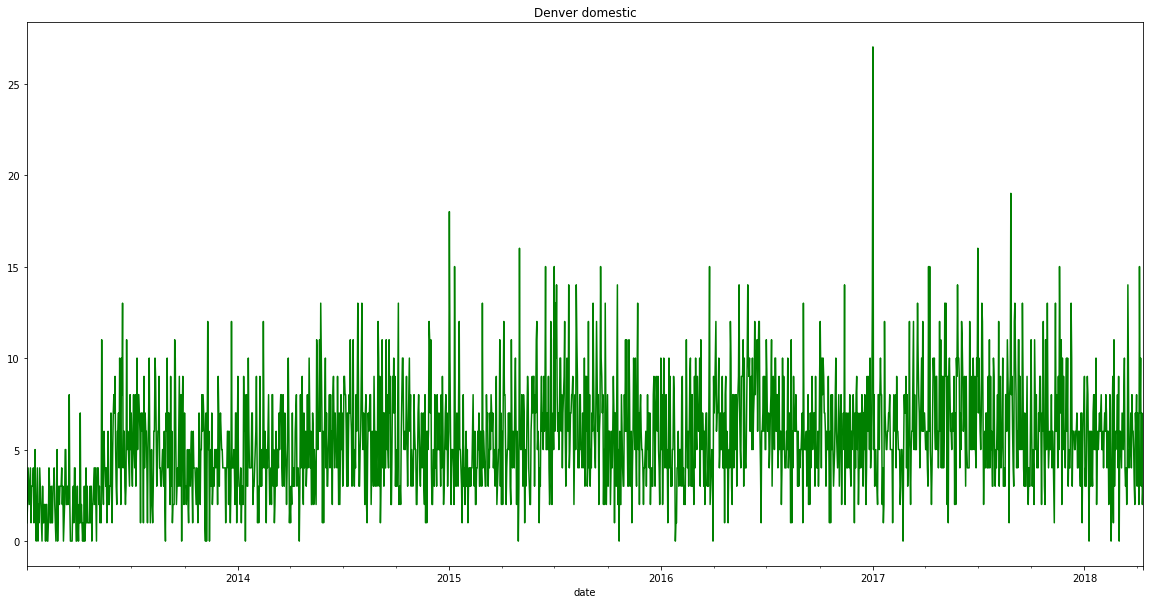

In [27]:
plt.subplot()

a1p = brocrime[brocrime['Description'] == "domestic"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10), color = 'green')

plt.title('Denver domestic')


plt.show

# Crime vs Results

A day by day comparison of domestic violence and the games..

<function matplotlib.pyplot.show>

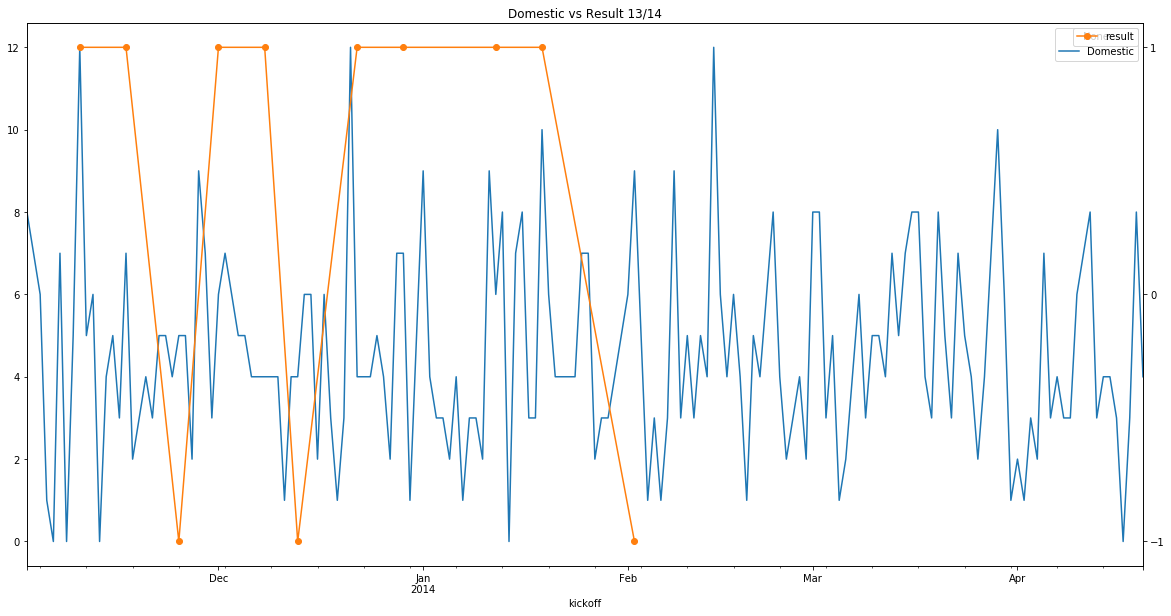

In [28]:

c1 = brocrime.loc['2013-11-02':'2014-04-20']
ass1 = c1[c1['Description'] == "domestic"]['Description']
ass1.resample('D').count().plot()
plt.title('Domestic vs Result 13/14')
plt.legend([ 'Domestic'])

ctest5 = broRes.loc['2013-11-02':'2014-04-20']
ctest5['bro Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'result'])

plt.show

All seasons from 2014 to 2015...

<function matplotlib.pyplot.show>

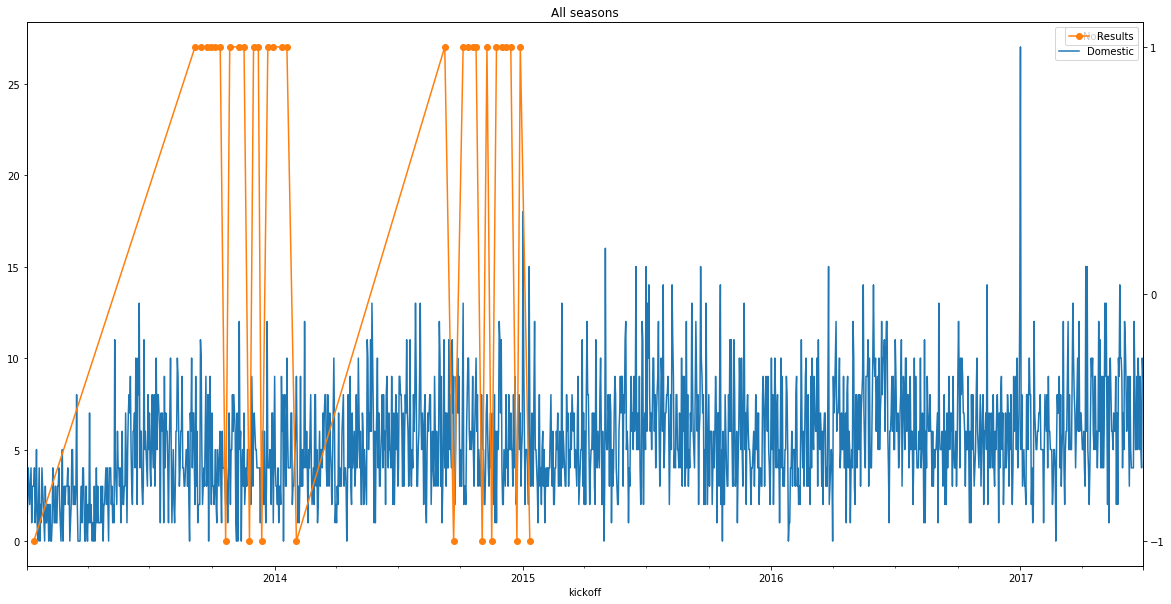

In [29]:
c1 = brocrime.loc['2007-11-02':'2017-06-30']
ass1 = c1[c1['Description'] == "domestic"]['Description']
ass1.resample('D').count().plot()
plt.title('All seasons')
plt.legend([ 'Domestic'])
ctest7 = broRes.loc['2007-11-02':'2017-06-30']
ctest7['bro Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Results'])
plt.show

# Denver Broncos Form

Binning the games by every 2 months gives us a better idea to when the winning and losing streaks occurred. The lowest sum was between December 2012 and January 2013 when their form was -1. The highest was from December 2013 to January 2014 with a sum of 5.  

In [30]:
chMonthly = broRes.resample('2M').sum()
chMonthly = chMonthly.dropna(subset = ['bro Res'])
chMonthly.sort_values(by=['bro Res'])

,bro Res
kickoff,
2013-01-31,-1.0
2014-03-31,-1.0
2014-09-30,0.0
2015-01-31,2.0
2013-11-30,3.0
2013-09-30,4.0
2014-11-30,4.0
2014-01-31,5.0


Showing the best form with all three crimes... 

<function matplotlib.pyplot.show>

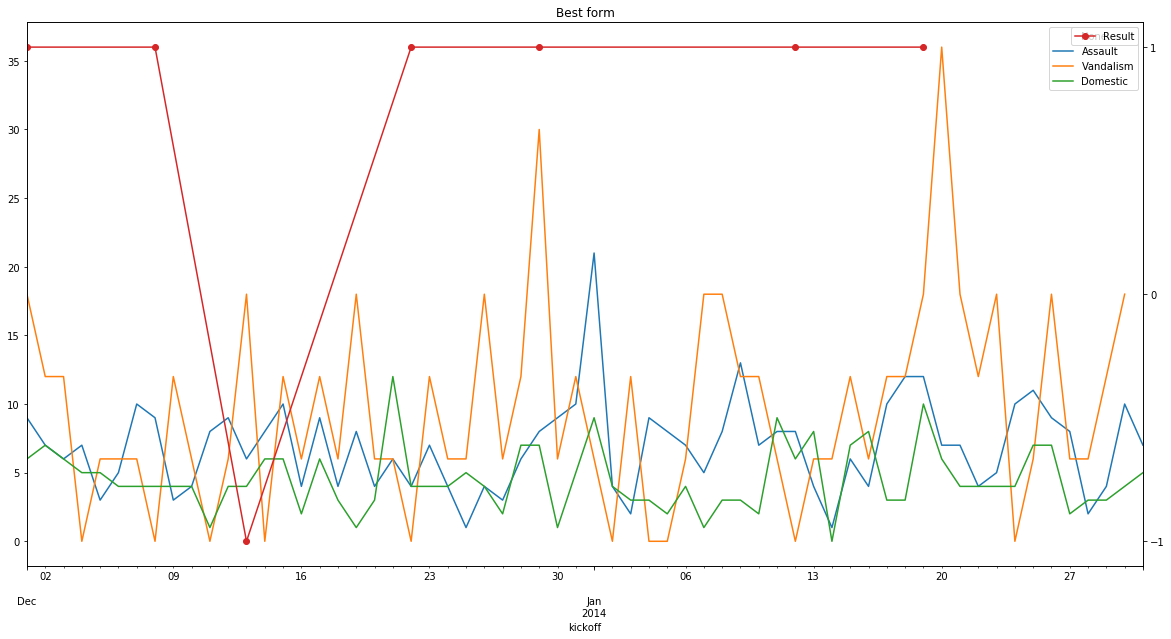

In [31]:
plt.subplot()

c = brocrime.loc['2013-12-01':'2014-01-31']
a1 = c[c['Description'] == "assault"]['Description']
a1.resample('D').count().plot()

v1 = c[c['Description'] == "vandalism"]['Description']
v1.resample('D').count().plot()

d1 = c[c['Description'] == "domestic"]['Description']
d1.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Best form')

ct = broRes.loc['2013-12-01':'2014-01-31']
ct['bro Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))


plt.legend([ "Result"])
plt.show

The one loss in this period sees a significant rise in vandalism. However vandalism also rises during the winning period. Assault and Domestic is undramatic

The bad form above is -1, but that is bacause they are the only games played in that period and they resulted in a loss. Otherwise the form is good. 

Only one game was played in this period and it was a loss. The other -1 form result. Therefore there has been no negative form for the Broncos in this dataset period.

# Denver Broncos Win/Lose Streaks

A function to create streak columns

In [32]:
def streaks(broRes, col):
    sign = np.sign(broRes[col])
    s = sign.groupby((sign!=sign.shift()).cumsum()).cumsum()
    return broRes.assign(win_streak=s.where(s>0, 0.0), lose_streak=s.where(s<0, 0.0).abs())

Running that function and adding it to the broRes dataframe..

In [33]:
broRes = streaks(broRes, 'bro Res')

In [34]:
broRes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2013-01-12 to 2015-01-11
Data columns (total 3 columns):
bro Res        36 non-null int32
lose_streak    36 non-null float64
win_streak     36 non-null float64
dtypes: float64(2), int32(1)
memory usage: 1008.0 bytes


Sorting the dataframe by the losing streak column..

In [35]:
broRes.sort_values(by=['lose_streak'], ascending= False).head()

,bro Res,lose_streak,win_streak
kickoff,,,
2013-01-12,-1,1.0,0.0
2013-11-25,-1,1.0,0.0
2014-12-23,-1,1.0,0.0
2014-11-16,-1,1.0,0.0
2014-11-02,-1,1.0,0.0


There has been no losing streaks within this time period so this can't be analysed. 

Sorting the dataframe by the win streak column

In [36]:
broRes.sort_values(broRes.columns[2], ascending = False).head()

,bro Res,lose_streak,win_streak
kickoff,,,
2013-10-13,1,0.0,6.0
2013-10-06,1,0.0,5.0
2014-01-19,1,0.0,4.0
2014-10-24,1,0.0,4.0
2014-12-14,1,0.0,4.0


Analysing the period where that win streak took place...

<function matplotlib.pyplot.show>

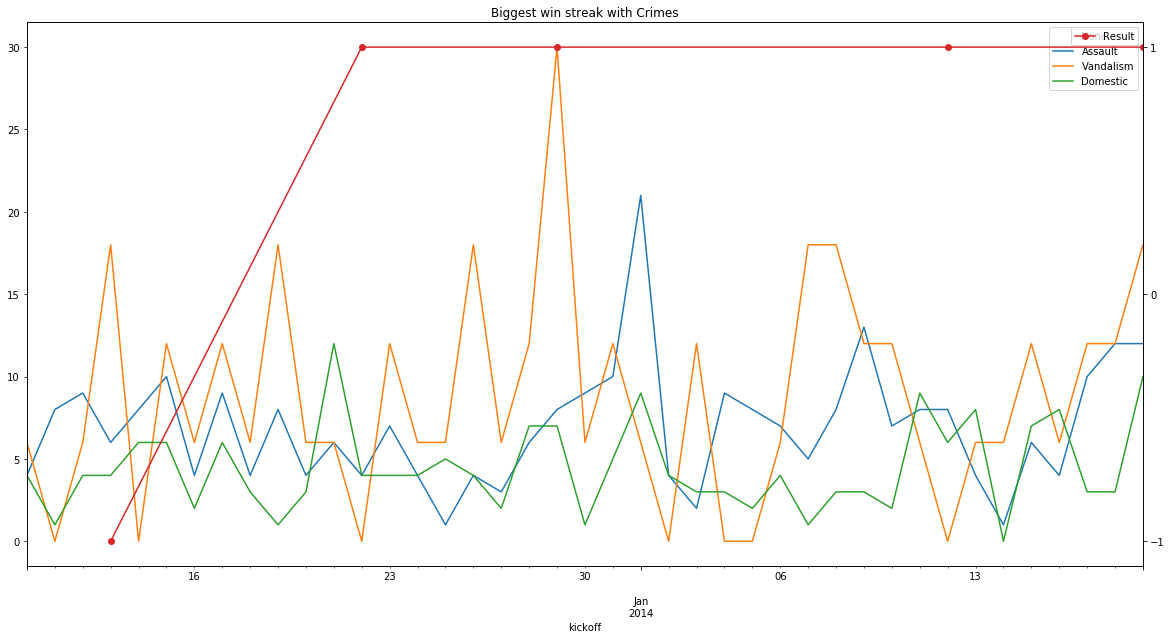

In [37]:
plt.subplot()

cp = brocrime.loc['2013-12-10':'2014-01-19']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Biggest win streak with Crimes')

ctp = broRes.loc['2013-12-10':'2014-01-19']
ctp['bro Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Text(0.5,1,'Biggest win streak with Crimes')

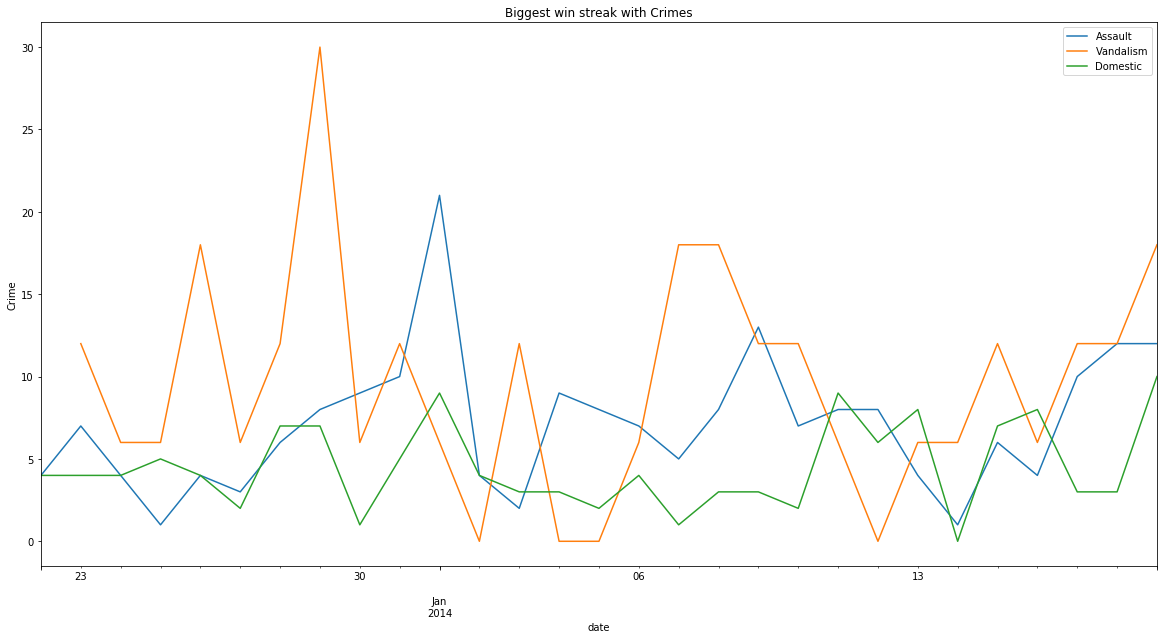

In [39]:
plt.subplot()

cp = brocrime.loc['2013-12-22':'2014-01-19']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Biggest win streak with Crimes')

2/4 see a fall in vandalism. 3/4 see a fall in domestic violence. 2/4 see a rise in assault despite the win streak. 

### Comparison with the period before longest win streak

In [38]:
cp = brocrime.loc['2013-11-25':'2013-12-22']

print('Period before Winning Streak')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Winning Streak:')

cp0 = brocrime.loc['2013-12-22':'2014-01-19']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Winning Streak
Assault = 6.0
Vandalism = 9.333333333333334
Domestic = 4.714285714285714
 
Period of Winning Streak:
Assault = 7.068965517241379
Vandalism = 9.642857142857142
Domestic = 4.517241379310345


Domestic violence was the only crime to reduce, and in a marginal way. Therefore, the win streak had no real negative effect on the crime rate